In [2]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Data Set Information 

`uci_id`: Unique dataset identifier for UCI repository name
`abstract`: Short description of dataset
`area`: Subject area e.g. life science, business
`task`: Associated machine learning tasks e.g. classification, regression
`characteristics`: Dataset types e.g. multivariate, sequential
`num_instances`: Number of rows or samples
`num_features`: Number of feature columns
`feature_types`: Data types of features
`target_col`: Name of target column(s)
`index_col`: Name of index column(s)
`has_missing_values`: Whether the dataset contains missing values
`missing_values_symbol`: Indicates what symbol represents the missing entries (if the dataset has missing values)
year_of_dataset_creation
`dataset_doi`: DOI registered for dataset that links to UCI repo dataset page
`creators`: List of dataset creator names
`intro_paper`: Information about dataset's published introductory paper
`repository_url`: Link to dataset webpage on the UCI repository
`data_url`: Link to raw data file
`additional_info`: Descriptive free text about dataset
`summary`: General summary
`purpose`: For what purpose was the dataset created?
`funding`: Who funded the creation of the dataset?
`instances_represent`: What do the instances in this dataset represent?
`recommended_data_splits`: Are there recommended data splits?
`sensitive_data`: Does the dataset contain data that might be considered sensitive in any way?
`preprocessing_description`: Was there any data preprocessing performed?


In [3]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
#list_available_datasets()

# import dataset
wine_dataset = fetch_ucirepo(id=186)

In [4]:
wine_dataset.data.features

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [5]:
wine_dataset.data.targets

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


In [6]:
y = wine_dataset.data.targets
X = wine_dataset.data.features

In [7]:
from pprint import pprint
pprint(wine_dataset.metadata.abstract)

('Two datasets are included, related to red and white vinho verde wine '
 'samples, from the north of Portugal. The goal is to model wine quality based '
 'on physicochemical tests (see [Cortez et al., 2009], '
 'http://www3.dsi.uminho.pt/pcortez/wine/).')


In [8]:
pprint(wine_dataset.metadata)

{'abstract': 'Two datasets are included, related to red and white vinho verde '
             'wine samples, from the north of Portugal. The goal is to model '
             'wine quality based on physicochemical tests (see [Cortez et al., '
             '2009], http://www3.dsi.uminho.pt/pcortez/wine/).',
 'additional_info': {'citation': None,
                     'funded_by': None,
                     'instances_represent': None,
                     'preprocessing_description': None,
                     'purpose': None,
                     'recommended_data_splits': None,
                     'sensitive_data': None,
                     'summary': 'The two datasets are related to red and white '
                                'variants of the Portuguese "Vinho Verde" '
                                'wine. For more details, consult: '
                                'http://www.vinhoverde.pt/en/ or the reference '
                                '[Cortez et al., 2009].  Due to pri

Note:
This dataset has an additional column where you can see if the wine was red or white, could be a great binary classification problem.  Right now we will focus on predicting the quality of the wine from 0-10 which makes this a multi-classification problem.

In [34]:
# No missing values
X.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [35]:
X.shape

(6497, 11)

In [17]:
import pandas as pd
X_full = pd.concat([X,y],axis=1)
X_full.groupby('quality').describe().transpose()

quality                      3           4            5            6  \
fixed_acidity count  30.000000  216.000000  2138.000000  2836.000000   
              mean    7.853333    7.288889     7.326801     7.177257   
              std     1.747853    1.264825     1.260002     1.291191   
              min     4.200000    4.600000     4.500000     3.800000   
              25%     6.800000    6.400000     6.500000     6.400000   
...                        ...         ...          ...          ...   
alcohol       min     8.000000    8.400000     8.000000     8.400000   
              25%     9.625000    9.400000     9.300000     9.600000   
              50%    10.150000   10.000000     9.600000    10.500000   
              75%    11.000000   10.900000    10.300000    11.400000   
              max    12.600000   13.500000    14.900000    14.000000   

quality                        7           8          9  
fixed_acidity count  1079.000000  193.000000   5.000000  
              mean      7.128962    6.835233   7.420000  
              std       1.372141    1.147235   0.983362  
              min       4.200000    3.900000   6.600000  
              25%       6.300000    6.200000   6.900000  
...                          ...         ...        ...  
alcohol       min       8.600000    8.500000  10.400000  
              25%      10.625000   11.000000  12.400000  
              50%      11.400000   12.000000  12.500000  
              75%      12.300000   12.600000  12.700000  
              max      14.200000   14.000000  12.900000  

[88 rows x 7 columns]

In [103]:
print(y.value_counts())

quality
6          2836
5          2138
7          1079
4           216
8           193
3            30
9             5
dtype: int64


### Notes:
- The dataset is imbalanced, with the majority of the data being of quality 5 and 6.
- The dataset has no missing values.
- The dataset has 11 features and 1 target variable.
- Fitting a model to this dataset would not predict the quality of the wine well, as the dataset is imbalanced.The model would predict the majority class most of the time.


Text(0.5, 1.0, 'Fixed Acidity vs Quality')

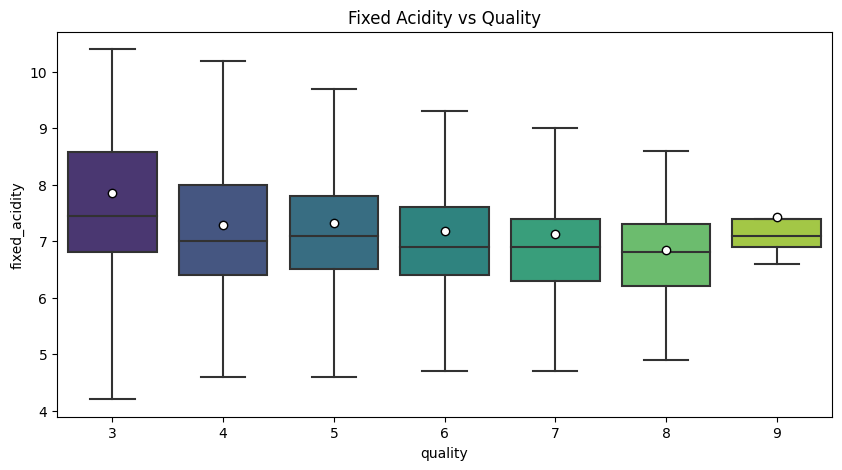

In [28]:
## Lets look at the distribution of features per class
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(data=X_full, x='quality', y='fixed_acidity',
            showmeans=True, meanprops={"marker":"o",
                                        "markerfacecolor":"white", 
                                        "markeredgecolor":"black"},
                                        showfliers=False, palette='viridis')
plt.title('Fixed Acidity vs Quality')


No outliershow means are inflated because plot excludes outliers but uses them to calculate the means in the data.
Wine acicity decreases with quality of the wine,

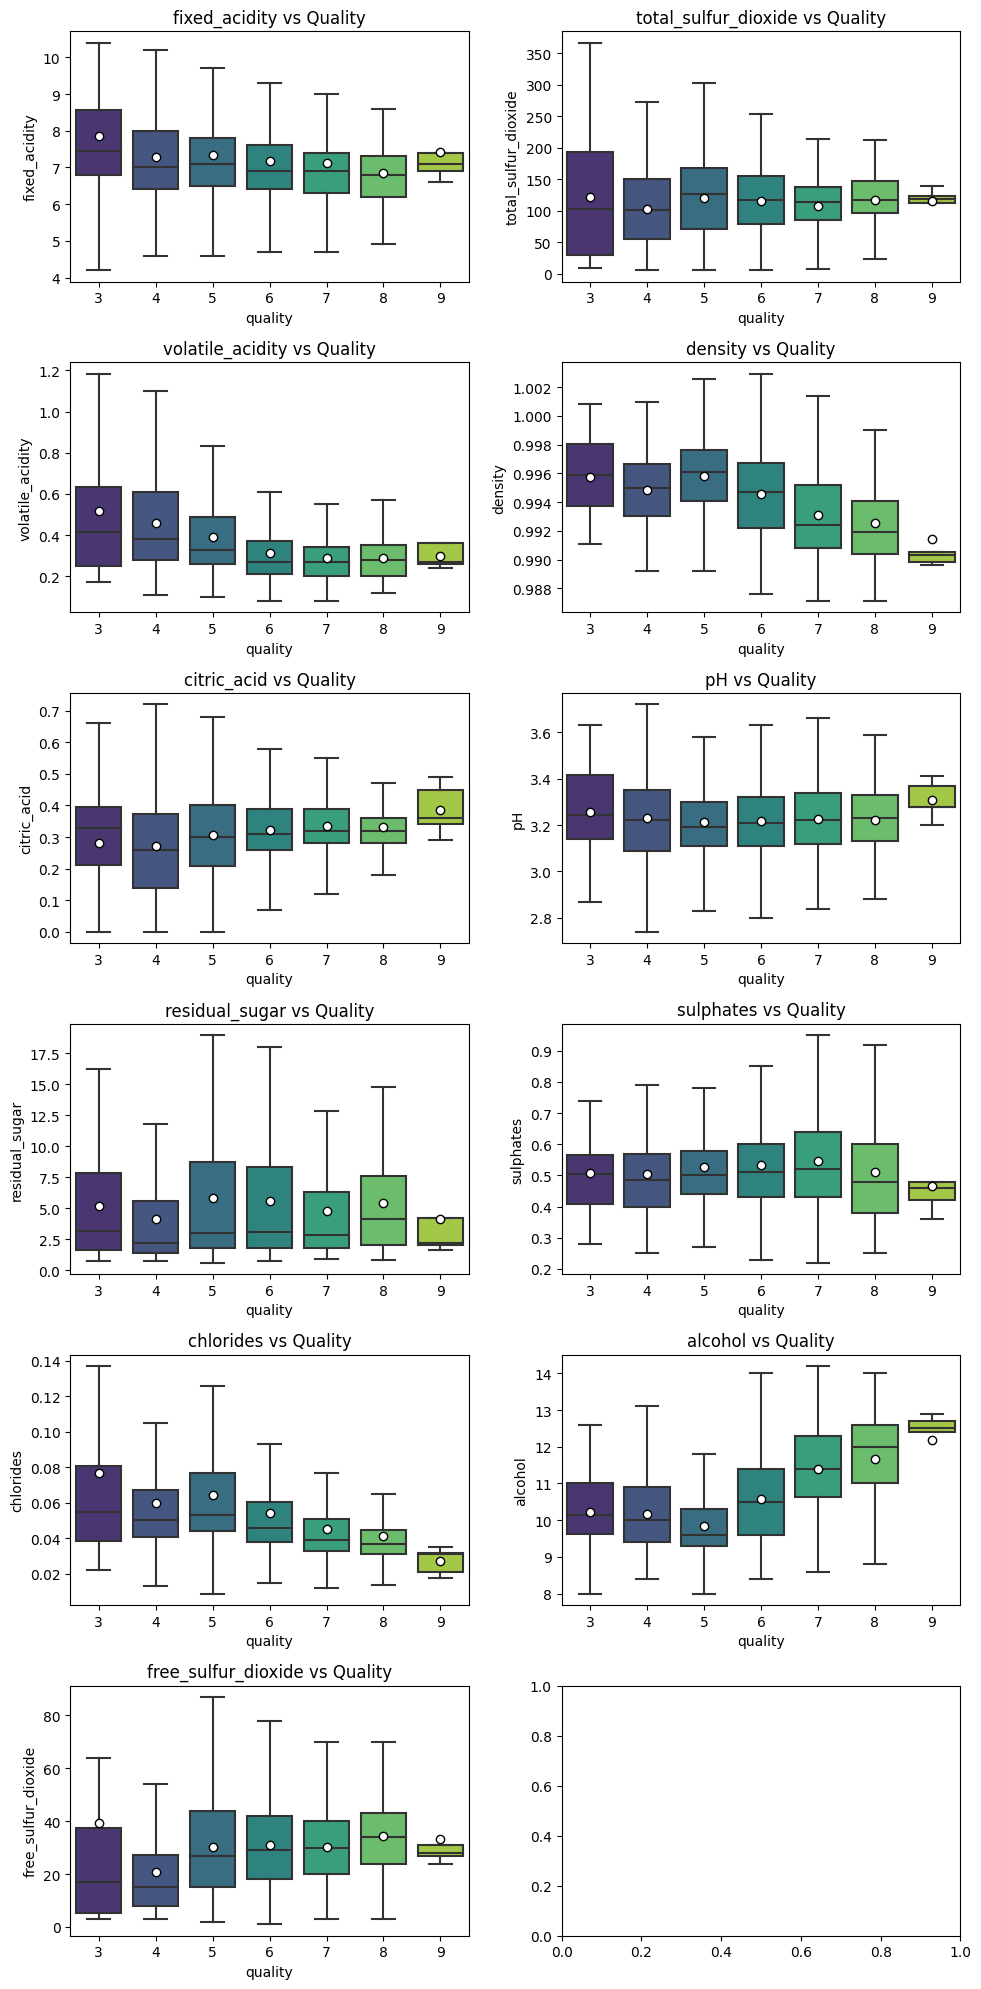

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10,20))
i = 0;j = 0
for feature in X_full.columns[:-1]:
    sns.boxplot(data=X_full,x='quality', y=feature,
                showmeans=True, meanprops={"marker":"o",
                                            "markerfacecolor":"white", 
                                            "markeredgecolor":"black"},
                                            showfliers=False, palette='viridis',
                                            ax=axes[i,j])
    axes[i,j].set_title(f'{feature} vs Quality')
    
    if i < 5:
        i += 1
    else:
        j += 1
        i = 0

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Pearson Correlation Heatmap')

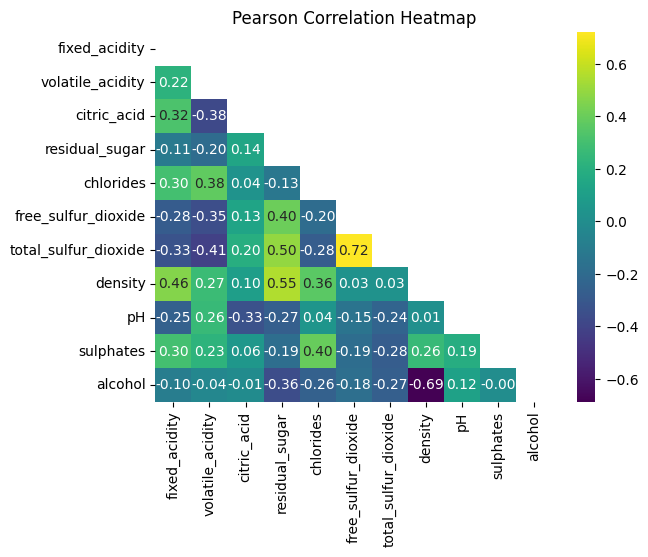

In [80]:
import numpy as np

sns.heatmap(X.corr(), annot = True, mask = np.triu(X.corr()), 
            cmap='viridis', fmt='.2f')            
plt.title('Pearson Correlation Heatmap')

### Notes:

- PH, residual_sugar, sulphates and total sulfur dioxide seems unaffected by quality based on mean, although there are variable variance mostly due to variation in sample sizes per category.
- Correlation between free_sulfur dioxide and total_sulfur which may indicate that total sulfur is a measurement that might involve in itself the addition of free_sulfur (redundant variable).
- Negative correlation between density and alcohol "strong" after quality 5 and above. No strong relationship found in other variables. 
- These findings would be similar to what would be found under an ANOVA test.

# Multi-class classification problem
- Try Multi-class AdaBoost, CatBoost, XGBoost, LightGBM, Random Forest, Decision Tree, KNN, Logistic Regression, SVM, Naive Bayes, Neural Network, etc.
- How to deal with inbalanced classes?
- Do we want to predict ordinal numbers or categories of numbers?
- Feature Selection
- Clusterings are there any KMeans vs Gausian Mixture Models. 

In [110]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [112]:
!/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 1.2 MB/s eta 0:00:00a 0:00:010m
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1


In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
# Trying XGBoost without fixing for the imabalanced dataset

from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(X_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(X_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

print('Accuracy score is:', xbg_score)


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/dlebron/Library/Python/3.9/lib/python/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <BBC4A126-D15A-3802-AD26-108872BA781A> /Users/dlebron/Library/Python/3.9/lib/python/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]
